# Part-1 Prepare dataset for analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics

In [2]:
df = pd.read_csv('movies.csv')      #  Exported as "UTF-8" CSV file 
df.head()
# Try "pd.io.parsers.read_csv" if it doesn't accept it.

,Movie,Oscar_won,Year,Tomato_meter,T_Audience,Imdb,Tag-1,Tag-2,Tag-3,English/ Non,Certificate,Hour,Min,Director,DirectorPriorOscar,Category,Unnamed: 16,Unnamed: 17
0,The Shawshank Redemption,0,1994,90,98,9.2,Drama,NaN,NaN,NaN,R,2,22,Frank Darabont,N,Best ranking,NaN,NaN
1,The Godfather,3,1972,98,98,9.1,Crime,Drama,NaN,NaN,R,2,55,Francis Ford Coppola,Y,Best ranking,NaN,NaN
2,The Godfather 2,6,1974,97,97,9.0,Crime,Drama,NaN,NaN,R,3,22,Francis Ford Coppola,Y,Best ranking,NaN,NaN
3,The Dark Knight,2,2008,94,94,9.0,Action,NaN,NaN,NaN,PG-13,2,32,Christopher Nolan,N,Best ranking,NaN,NaN
4,12 Angry Men,0,1957,100,97,8.9,Crime,Drama,NaN,NaN,Approved,1,36,Sidney Lumet,N,Best ranking,NaN,NaN


## Redefining colums for better meaning

In [3]:
## Additional useful commands
#df.groupby('Movie')['Imdb'].mean()
#df.Certificate.values

In [4]:
# Modifying oscar count to just Yes or No 
oscar_num = df['Oscar_won']
oscar_binary = []
for item in oscar_num:
    if item!=0:
        oscar_binary.append("Y")
    else:
        oscar_binary.append("N")
oscar_binary[:5]
#xx = np.array(oscar_num)
#print (np.isnan(xx))
df['Oscar'] = oscar_binary
del oscar_binary, oscar_num, item

In [5]:
# Modifying Non-English value as Others
lang = df['English/ Non']
language = []
for item in lang:
    if item=="Non":
        language.append("Others")
    else:
        language.append("English")
language[5:10]
df['Language'] = language
del language, lang, item

In [6]:
# Calculating the total duration in mins and appending a new column
duration = []
hrs = df['Hour']
mins = df['Min']
#print(hrs.isnull().values.any())
#print(mins.isnull().values.any())
for i in range(len(hrs)):
    dur = (60*hrs[i])+mins[i]
    duration.append(dur)
duration[:5]
df['Duration'] = duration
del duration, i, dur, hrs, mins

In [7]:
# Dropping unwanted columns
df.drop(['Oscar_won', 'English/ Non', 'Director','Category','Unnamed: 16', 'Unnamed: 17', 'Hour', 'Min'],axis=1,inplace=True)

In [8]:
df.head(3)

,Movie,Year,Tomato_meter,T_Audience,Imdb,Tag-1,Tag-2,Tag-3,Certificate,DirectorPriorOscar,Oscar,Language,Duration
0,The Shawshank Redemption,1994,90,98,9.2,Drama,NaN,NaN,R,N,N,English,142
1,The Godfather,1972,98,98,9.1,Crime,Drama,NaN,R,Y,Y,English,175
2,The Godfather 2,1974,97,97,9.0,Crime,Drama,NaN,R,Y,Y,English,202


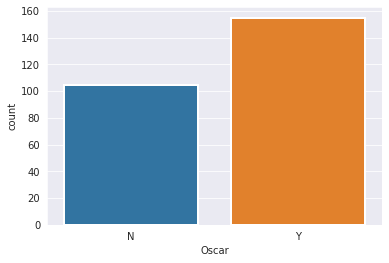

In [9]:
# Number of samples won oscar and didn't won
with sns.axes_style("darkgrid"):
    sns.countplot(x='Oscar', data=df, linewidth=2,)      # ,palette="Set1"

# Part-2 investigating correlation between attributes

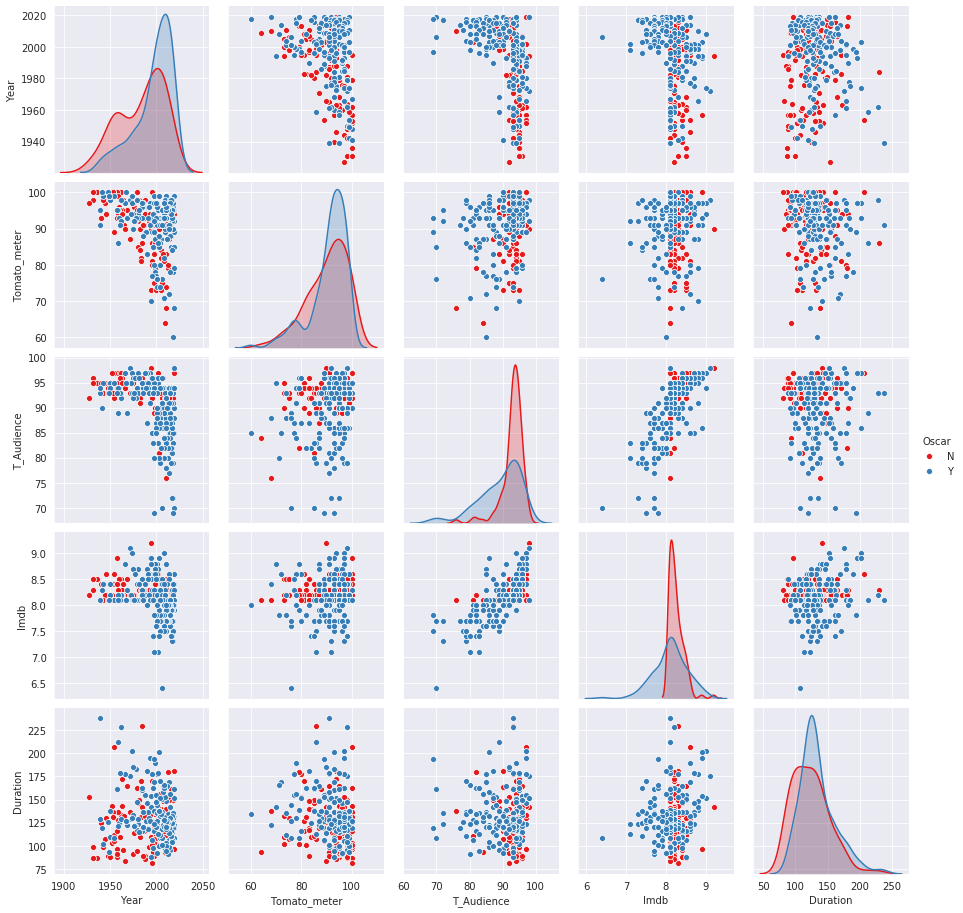

In [10]:
# Pairplot to see inter-attribute relations
with sns.axes_style("darkgrid"):
    sns.pairplot(df,hue='Oscar',palette='Set1')

R-squared value: 0.09699191694370482


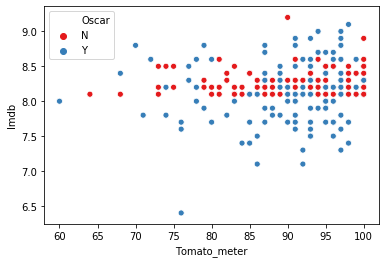

In [11]:
# Just checking the correlation between various ratings
sns.scatterplot(x='Tomato_meter', y='Imdb', hue='Oscar', data=df, palette='Set1')
stat = stats.linregress(df['Tomato_meter'],df['Imdb'])
print("R-squared value:",stat[2])

R-squared value: 0.7011919069126306


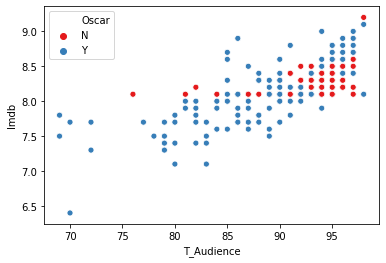

In [12]:
sns.scatterplot(x='T_Audience', y='Imdb', hue='Oscar', data=df, palette='Set1')
stat = stats.linregress(df['T_Audience'],df['Imdb'])
print("R-squared value:",stat[2])

R-squared value: 0.254403779940039


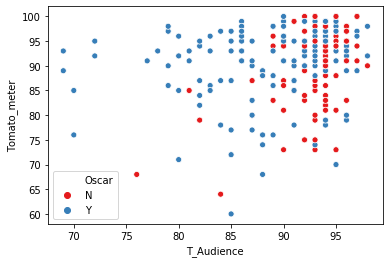

In [13]:
sns.scatterplot(x='T_Audience', y='Tomato_meter', hue='Oscar', data=df, palette='Set1')
stat = stats.linregress(df['T_Audience'],df['Tomato_meter'])
print("R-squared value:",stat[2])
del stat

In [14]:
df.head(3)

,Movie,Year,Tomato_meter,T_Audience,Imdb,Tag-1,Tag-2,Tag-3,Certificate,DirectorPriorOscar,Oscar,Language,Duration
0,The Shawshank Redemption,1994,90,98,9.2,Drama,NaN,NaN,R,N,N,English,142
1,The Godfather,1972,98,98,9.1,Crime,Drama,NaN,R,Y,Y,English,175
2,The Godfather 2,1974,97,97,9.0,Crime,Drama,NaN,R,Y,Y,English,202


# Logistic Regression

## Need to identify unique tags and make seperate binary column for each of them

In [15]:
#recommendation.dropna(inplace=True)

In [16]:
## Finding the unique tags in each Tag column
# Making seperate variable representing the values in each column while fillinf Na values in X
t1 = df['Tag-1'].fillna("X")
t2 = df['Tag-2'].fillna("X")
t3 = df['Tag-3'].fillna("X")
# Get unique values in each list
uniq_t1 = list(set(t1)) 
uniq_t2 = list(set(t2))
uniq_t3 = list(set(t3))
# Clubing together
tag_all = [uniq_t1, uniq_t2, uniq_t3]
del uniq_t1, uniq_t2, uniq_t3

In [17]:
# Identifying the unique tags from all tag columns
tags = []
for unique in tag_all:
    for element in unique:
        tags.append(element)
# output after the set will not not a list. It has to be called specifically as a list to get it as list
tags = list(set(tags))
#tags

In [18]:
# Making a dictionary having in which keys are all unique genre and each values of each keys represents whether the film
# falls in the category or not
diction = {}
tag_cols = [t1, t2, t3]
for genre in tags:
    var1 = np.zeros_like(t1)
    for colm in tag_cols:
        temp_index = np.where(colm == genre)
        for index in temp_index:
            var1 [index] = 1
    diction[genre] = var1
del var1, temp_index, tag_cols, colm, genre, index, tag_all, t1, t2, t3, unique, element
#diction

In [19]:
# Additing new columns (each for all unique tags) from the dictionary to DataFrame 
for genre in tags:
    df[genre] = diction[genre]
del tags, genre, diction

In [20]:
df.drop(['X', 'Tag-1', 'Tag-2', 'Tag-3'],axis=1,inplace=True) # X was made to represent NaN values.
df.columns.values

array(['Movie', 'Year', 'Tomato_meter', 'T_Audience', 'Imdb',
       'Certificate', 'DirectorPriorOscar', 'Oscar', 'Language',
       'Duration', 'Action', 'Music', 'Western', 'Drama', 'Mystery',
       'Film-Noir', 'War', 'Family', 'Fantasy', 'Sci-Fi', 'Biography',
       'Sport', 'Crime', 'Animation', 'Romance', 'History', 'Thriller',
       'Comedy', 'Adventure', 'Horror'], dtype=object)

## Actual regression starts

In [21]:
from sklearn.preprocessing import LabelEncoder
#df = df.apply(LabelEncoder().fit_transform)
# converting categorocal data to numerical
le = LabelEncoder()
df['Language'] =le.fit_transform(df['Language'] )
df['Certificate'] =le.fit_transform(df['Certificate'] )
df['Oscar'] =le.fit_transform(df['Oscar'] )
df['DirectorPriorOscar'] =le.fit_transform(df['DirectorPriorOscar'] )
df.head(3)

,Movie,Year,Tomato_meter,T_Audience,Imdb,Certificate,DirectorPriorOscar,Oscar,Language,Duration,...,Biography,Sport,Crime,Animation,Romance,History,Thriller,Comedy,Adventure,Horror
0,The Shawshank Redemption,1994,90,98,9.2,7,0,0,0,142,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1972,98,98,9.1,7,1,1,0,175,...,0,0,1,0,0,0,0,0,0,0
2,The Godfather 2,1974,97,97,9.0,7,1,1,0,202,...,0,0,1,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
# Defining X and Y attributes. Using the X attributes, Y is predicted
X = df[['Year', 'Tomato_meter', 'T_Audience','Imdb', 'Certificate', 'Language','Duration',
             'DirectorPriorOscar', 'Film-Noir', 'Sport', 'Horror', 'Family', 'Mystery',
             'Thriller', 'Fantasy', 'War', 'Adventure', 'Biography', 'Crime', 'History', 'Music',
             'Drama', 'Action', 'Romance', 'Animation', 'Sci-Fi', 'Comedy', 'Western']]
y = df['Oscar']

# It can be done using another way as well. First is rows selection and 2nd is column selection. Note that X shouldn't
# contain oscar. Y should be oscar.
#X = df_tree.iloc[:,1:-1]
#y = df.tree.iloc[:,-1]
#df

In [23]:
# Split the whole dataset into dataset for training the model and dataset for testing the model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
len(X_test)

52

In [24]:
X_train.head(3)

,Year,Tomato_meter,T_Audience,Imdb,Certificate,Language,Duration,DirectorPriorOscar,Film-Noir,Sport,...,Crime,History,Music,Drama,Action,Romance,Animation,Sci-Fi,Comedy,Western
64,1999,93,94,8.4,5,1,134,1,0,0,...,0,0,0,0,0,0,1,0,0,0
229,2014,90,91,8.0,5,0,114,0,0,0,...,0,0,0,1,0,0,0,0,0,0
227,2015,88,88,7.8,7,0,130,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# Creating the model / fitting the model according to the train dataset
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000) # Try 1000 (default)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Predicting Y values from X attributes of the test datasets
y_predicted = logmodel.predict(X_test)
#y_predicted

In [27]:
# Comparing Y-predicted and Y-actual
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.86      0.89      0.88        28

    accuracy                           0.87        52
   macro avg       0.87      0.86      0.86        52
weighted avg       0.87      0.87      0.87        52



In [28]:
logmodel.score(X_test, y_test) # Accuracy

0.8653846153846154

In [29]:
# To see the probability to get an Oscar award
#logmodel.predict_proba(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

In [31]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)
print("specificity",specificity)
precision = TP / float(TP + FP)
print("precision",precision)
#print("Recall Score :", metrics.recall_score(y_test, y_predicted)) #  = Sensitivity
print("F1 Score :",metrics.f1_score(y_test, y_predicted))
print("Negative Predictive value", (TN/(TN+FN)))

sensitivity 0.8928571428571429
specificity 0.8333333333333334
precision 0.8620689655172413
F1 Score : 0.8771929824561403
Negative Predictive value 0.8695652173913043


Text(33.0, 0.5, 'Truth')

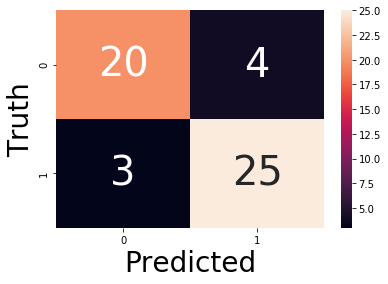

In [32]:
sns.heatmap(cm, annot=True, annot_kws={"size":40}) #fmt="f" for floaf
plt.xlabel('Predicted', fontsize =28)
plt.ylabel('Truth', fontsize =28)

In [33]:
del y_predicted, y, cm, le, TN, FP, FN, TP, sensitivity, specificity, precision, df

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [35]:
# Defining the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
# Testing predicted and original Y value
y_predicted = dtree.predict(X_test)
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.75      0.86      0.80        28

    accuracy                           0.77        52
   macro avg       0.78      0.76      0.76        52
weighted avg       0.77      0.77      0.77        52



In [37]:
cm = confusion_matrix(y_test,y_predicted)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)
print("specificity",specificity)
precision = TP / float(TP + FP)
print("precision",precision)
#print("Recall Score :", metrics.recall_score(y_test, y_predicted)) #  = Sensitivity
print("F1 Score :",metrics.f1_score(y_test, y_predicted))
print("Negative Predictive value", (TN/(TN+FN)))

sensitivity 0.8571428571428571
specificity 0.6666666666666666
precision 0.75
F1 Score : 0.7999999999999999
Negative Predictive value 0.8


In [38]:
dtree.score(X_test, y_test)

0.7692307692307693

Text(33.0, 0.5, 'Truth')

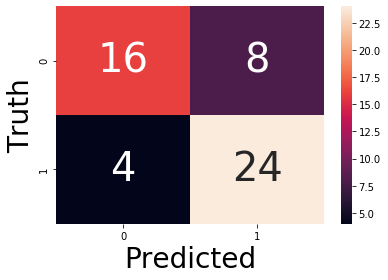

In [39]:
sns.heatmap(cm, annot=True, annot_kws={"size":40})
plt.xlabel('Predicted', fontsize =28)
plt.ylabel('Truth', fontsize =28)

In [40]:
from sklearn import tree
decision_tree = tree.export_graphviz(dtree,out_file='tree.dot',feature_names=X_train.columns,max_depth=3,filled=True)
!dot -Tpng tree.dot -o tree.png

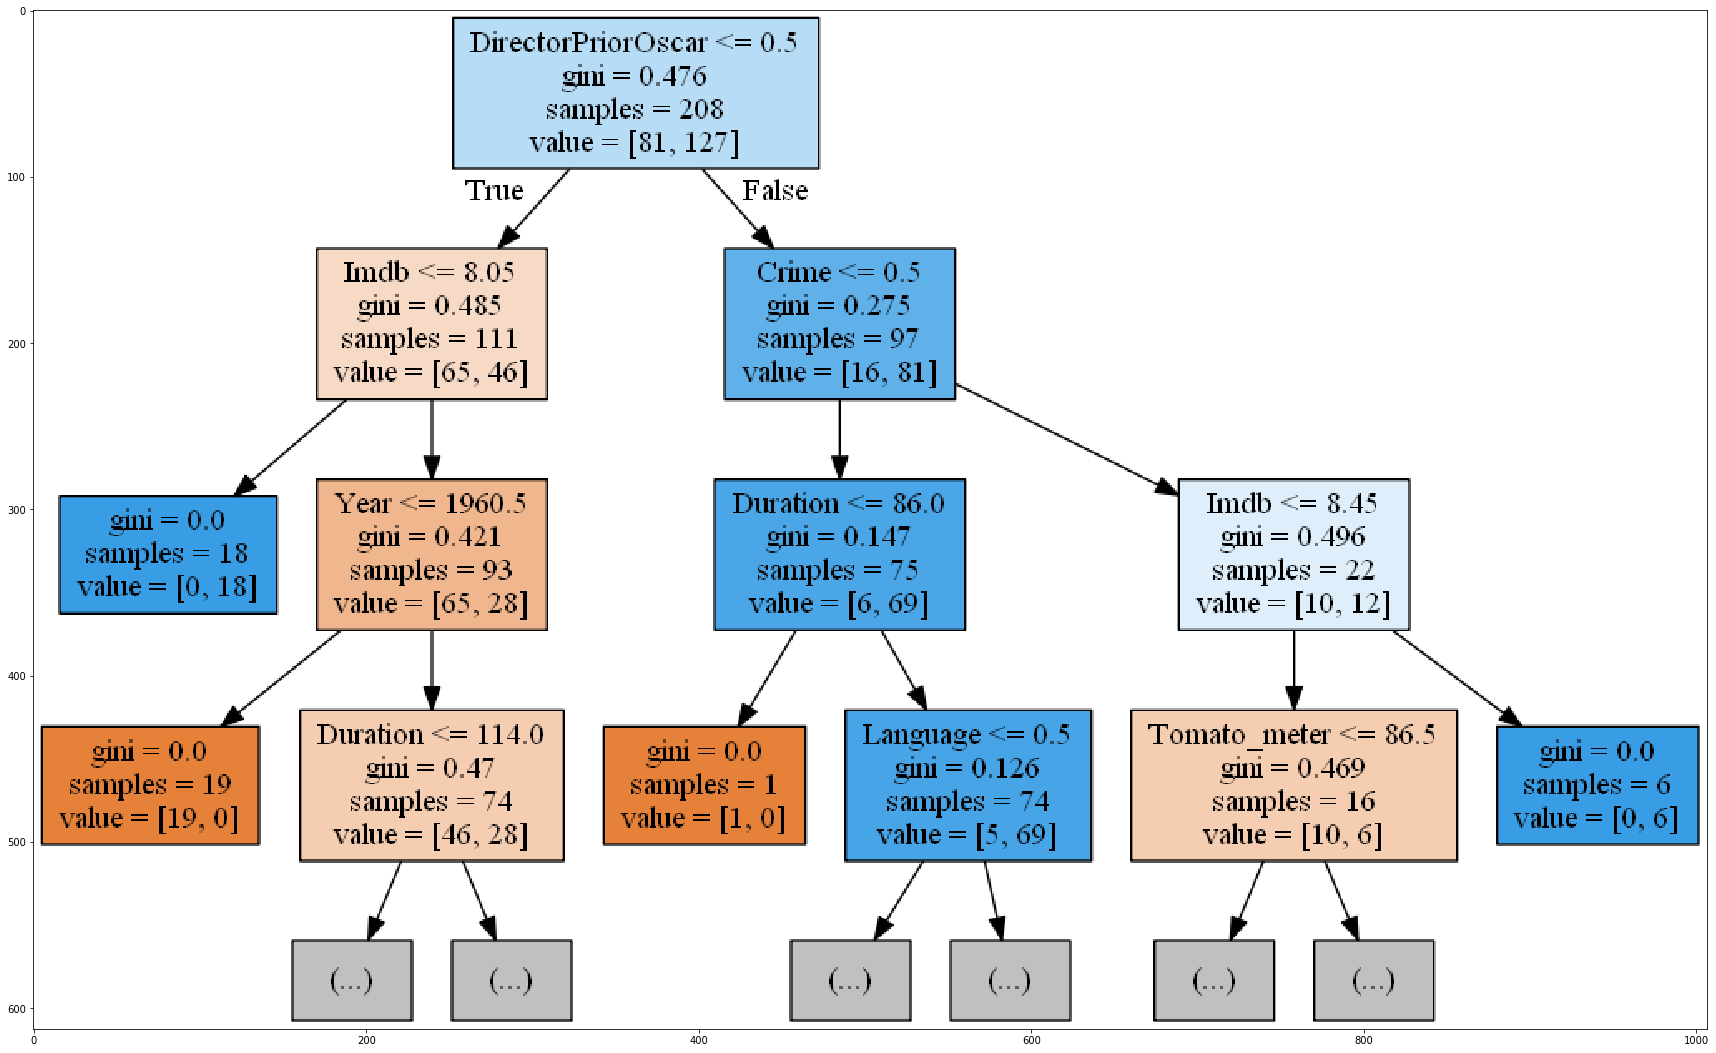

In [41]:
image = plt.imread('tree.png')
plt.figure(figsize=(30,30))
plt.imshow(image)

In [42]:
del y_predicted, cm, DecisionTreeClassifier, TN, FP, FN, TP, sensitivity, specificity, precision, image, decision_tree

# SVM Classification

In [43]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 1)
svcclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
y_predicted = svcclassifier.predict(X_test)
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.42      0.57        24
           1       0.66      0.96      0.78        28

    accuracy                           0.71        52
   macro avg       0.78      0.69      0.68        52
weighted avg       0.77      0.71      0.69        52



In [45]:
cm = confusion_matrix(y_test,y_predicted)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)
print("specificity",specificity)
precision = TP / float(TP + FP)
print("precision",precision)
#print("Recall Score :", metrics.recall_score(y_test, y_predicted)) #  = Sensitivity
print("F1 Score :",metrics.f1_score(y_test, y_predicted))
print("Negative Predictive value", (TN/(TN+FN)))

sensitivity 0.9642857142857143
specificity 0.4166666666666667
precision 0.6585365853658537
F1 Score : 0.782608695652174
Negative Predictive value 0.9090909090909091


In [46]:
# Model score is accuracy
svcclassifier.score(X_test, y_test)

0.7115384615384616

Text(33.0, 0.5, 'Truth')

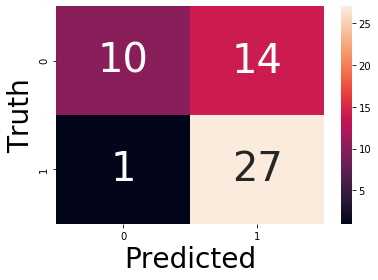

In [47]:
sns.heatmap(cm, annot=True, annot_kws={"size":40})
plt.xlabel('Predicted', fontsize =28)
plt.ylabel('Truth', fontsize =28)

In [48]:
del y_predicted, cm, SVC, TN, FP, FN, TP, sensitivity, specificity, precision

In [49]:
X.columns.values

array(['Year', 'Tomato_meter', 'T_Audience', 'Imdb', 'Certificate',
       'Language', 'Duration', 'DirectorPriorOscar', 'Film-Noir', 'Sport',
       'Horror', 'Family', 'Mystery', 'Thriller', 'Fantasy', 'War',
       'Adventure', 'Biography', 'Crime', 'History', 'Music', 'Drama',
       'Action', 'Romance', 'Animation', 'Sci-Fi', 'Comedy', 'Western'],
      dtype=object)

# User defined values for testing

In [50]:
oscar_sample = [[1993,97,97,8.9,7,0,195,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0],
                    [1990,83,87,8.0,5,0,181,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1]] # Schindlers list and Titanic
non_oscar_sample = [[1985,97,96,8.2,3,1,142,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0],
                    [2011,74,93,8.5,7,1,112,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0]] # ___ & The intouchables

In [51]:
# SVC
print(svcclassifier.predict(non_oscar_sample))
print(svcclassifier.predict(oscar_sample))

[0 0]
[1 1]


In [52]:
# Decision Tree
print(dtree.predict(non_oscar_sample))
print(dtree.predict(oscar_sample))

[0 0]
[1 1]


In [53]:
# Logistic Regression
print(logmodel.predict(non_oscar_sample))
print(logmodel.predict(oscar_sample))

[0 0]
[1 1]
